# k-Nearest Neighbors

El algoritmo de $k$-NN se basa en la cercanía que tienen los puntos de evaluación con respecto a los puntos de entrenamiento que pertenecen a una clase. Entre más vecinos de una clase tenga un punto, mayor probabilidad de pertenecer a esa clase.

Aquí mostramos una implementación de este algoritmo.

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

El algoritmo es simple, para <b>entrenar</b> se basa en guardar los datos supervisados, los puntos asociados a sus clases.

Es en la predicción en donde se hacen los cálculos, pues se estiman los $k$ vecinos más cercanos; es decir aquellos que cumplen:

$$||x-x'||_p \leq ||x-x''||_p$$

Para todo $x''$ en los puntos guardados. Usamos una familia de métricas que dependen de $p$ definidas como:

$$||x-x'||_p = \Big( \sum_i |x_i - x_i'|^p\Big)^{1/p}$$

De estos, $k$ vecinos se decide la clase en base a la clase que esté mejor representada por los vecinos. Se puede estimar una probabilidad como:

$$p(Y=y_i|x) = \frac{\mathrm{count}(y_i)}{k}$$

Es decir, el número de vecinos que pertenecen a una clase sobre el total de vecinos considerados. De tal forma que la clase predicha se puede estimar como:

$$\hat{y} = \arg\max_y p(Y=y|x)$$

In [2]:
class kNN():
    """
    Clase para el modelo de k-NN.
    """
    def __init__(self, k=1, p=2):
        #Núm de vecinos
        self.k = k
        #Métrica a utilizar
        self.metric = lambda u,v: sum([(u[i]-v[i])**p for i in range(len(u))])**(1/p)
        #Modelo de entrenamiento
        self.X = None
        self.Y = None
        self.n = 0
        
    def fit(self, X,Y):
        """
        Entrena la red guardando los datos de entrenamiento.
        """
        self.X = X
        self.Y = Y
        self.n = X.shape[0]
        
    def predict(self, x):
        """
        Función que predice la clase de un elemento.
        """
        #Guarda los puntos guardados y sus métricas con x
        results = []
        for j in range(self.n):
            #Calcula la cercanía
            close = self.metric(x,self.X[j])
            #Guarda las clases de los vecinos más cercanos
            results.append((close, self.Y[j]))
        
        #Considera sólo los k vecinos más cercanos
        knn = [neigh[1] for neigh in sorted(results)[:self.k]]
        #Cuenta las repeticiones de cada clase en los vecinos
        repetitions = Counter(knn)
        #Predice la clase más frecuente
        predicted_class = max(repetitions, key=repetitions.get) 
        
        return predicted_class
    
    def predict_proba(self, x):
        """
        Función para obtener la probabilidad de la clase dado x.
        """
        #Guarda los puntos guardados y sus métricas con x
        results = []
        for j in range(self.n):
            #Calcula la cercanía
            close = self.metric(x,self.X[j])
            #Guarda las clases de los vecinos más cercanos
            results.append((close, self.Y[j]))
        
        #Considera sólo los k vecinos más cercanos
        knn = [neigh[1] for neigh in sorted(results)[:self.k]]
        #Cuenta las repeticiones de cada clase en los vecinos
        repetitions = Counter(knn)
        #Guarda las probs.
        proba = {}
        for neigh, frec in repetitions.items():
            #Obtiene las probabilidades
            proba[neigh] = frec/self.k
        
        return proba

### Un ejemplo sencillo

Probamos el algoritmo de k-NN en un ejemplo sencillo con 4 puntos.

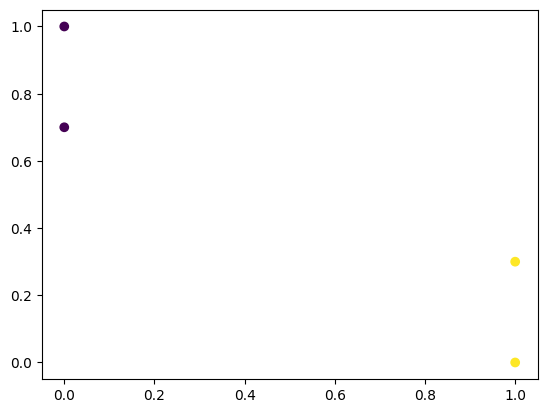

In [3]:
#Dataset de entrenamiento
X = np.array([[0,1], [0,0.7], [1,0], [1,0.3]])
y = [0, 0, 1, 1]

#Visualización
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
#Cargamos el modelo y lo entrenamos
knn = kNN(k=3, p=2)
knn.fit(X,y)

#Hacemos las predicciones
print(knn.predict([0.9,0.5]))
print(knn.predict_proba([0.9,0.5]))

1
{1: 0.6666666666666666, 0: 0.3333333333333333}


### Un ejemplo más complejo

Un ejemplo más completo lo tomamos de <i>sklearn</i> el dataset para predecir iris en plantas. Cargamos entonces este dataset:

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Cargamos el dataset
X = load_iris().data
Y = load_iris().target

# separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=123
)

Entrenamos con los datos de entrenamiento.

In [6]:
#Cargamos y entrenamos el modelo
model = kNN(k=5, p=2)
model.fit(x_train, y_train)

Y finalmente evaluamos el modelo obtenido con los datos del test:

In [7]:
#Obtenemos las clases que predice el modelo
y_pred = [model.predict(x) for x in x_test]
#Imprimimos la evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

